# **Forecasting Super Bowl LVIII**

## **1 Introduction**

In [79]:
import pandas as pd

excel = pd.ExcelFile(file_path)
sheet_number = len(excel.sheet_names)
sheet_number

4

In [80]:
sheets = pd.ExcelFile(file_path).sheet_names
sheets

['No Playoffs', 'With Playoffs', 'Power Tier', 'Sheet1']

In [81]:
no_playoffs_df = pd.read_excel(file_path, sheet_name='No Playoffs')
with_playoffs_df = pd.read_excel(file_path, sheet_name='With Playoffs')
power_tier_df = pd.read_excel(file_path, sheet_name='Power Tier')
sheet1_df = pd.read_excel(file_path, sheet_name='Sheet1')

In [82]:
pd.set_option('max_colwidth', None)
pd.set_option('display.max_columns', None)

In [83]:
pd.set_option('max_colwidth', None)
pd.set_option('display.max_columns', None)
no_playoffs_df.head()

,Team1,Week,Game Number,Game Location,Team2,Team1_Score,Team2_Score,Team1_Passing,Team1_Rushing,Team1_Turnovers,Team2_Passing,Team2_Rushing,Team2_Turnovers
0,Arizona Cardinals,1,1,AWAY,Washington Commanders,16,20,114,96,2,156,92,3
1,Arizona Cardinals,2,2,NaN,New York Giants,28,31,228,151,0,312,127,1
2,Arizona Cardinals,3,3,NaN,Dallas Cowboys,28,16,178,222,0,231,185,1
3,Arizona Cardinals,4,4,AWAY,San Francisco 49ers,16,35,257,105,0,271,124,0
4,Arizona Cardinals,5,5,NaN,Cincinnati Bengals,20,34,152,142,3,287,93,1


In [8]:
no_playoffs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Team1            544 non-null    object
 1   Week             544 non-null    int64 
 2   Game Number      544 non-null    int64 
 3   Game Location    272 non-null    object
 4   Team2            544 non-null    object
 5   Team1_Score      544 non-null    int64 
 6   Team2_Score      544 non-null    int64 
 7   Team1_Passing    544 non-null    int64 
 8   Team1_Rushing    544 non-null    int64 
 9   Team1_Turnovers  544 non-null    int64 
 10  Team2_Passing    544 non-null    int64 
 11  Team2_Rushing    544 non-null    int64 
 12  Team2_Turnovers  544 non-null    int64 
dtypes: int64(10), object(3)
memory usage: 55.4+ KB


In [84]:
def print_df_info_summary_with_name_and_breaks(df, df_name, cols_per_line = 1):
    total_columns = len(df.columns)
    summary_str = f"DataFrame Name: {df_name}\nTotal Columns: {total_columns}\n"
    for i, col in enumerate(df.columns, 1):
        non_null_count = df[col].notnull().sum()
        dtype = df[col].dtype
        summary_str += f"{col} (Non-Null: {non_null_count}, Dtype: {dtype})"
        if i % cols_per_line == 0 and i < total_columns:
            summary_str += "\n"
        else:
            summary_str += ", "
    print(summary_str.rstrip(', '))
print_df_info_summary_with_name_and_breaks(no_playoffs_df, 'no_playoffs_df', 1)

DataFrame Name: no_playoffs_df
Total Columns: 13
Team1 (Non-Null: 544, Dtype: object)
Week (Non-Null: 544, Dtype: int64)
Game Number (Non-Null: 544, Dtype: int64)
Game Location (Non-Null: 272, Dtype: object)
Team2 (Non-Null: 544, Dtype: object)
Team1_Score (Non-Null: 544, Dtype: int64)
Team2_Score (Non-Null: 544, Dtype: int64)
Team1_Passing (Non-Null: 544, Dtype: int64)
Team1_Rushing (Non-Null: 544, Dtype: int64)
Team1_Turnovers (Non-Null: 544, Dtype: int64)
Team2_Passing (Non-Null: 544, Dtype: int64)
Team2_Rushing (Non-Null: 544, Dtype: int64)
Team2_Turnovers (Non-Null: 544, Dtype: int64)


In [85]:
with_playoffs_df.head()

,Index,Team1,Week,Game Number,Game Location,Team2,Team1_Score,Team2_Score,Team1_Passing,Team1_Rushing,Team1_Turnovers,Team2_Passing,Team2_Rushing,Team2_Turnovers,Win,Loss,PRT1,PRT2,PR NET,P,Team 1 Power Tier 1,Team 2 Power Tier 1,Net Power Tier,Team 1 Power Rating 1,Team 2 Power Rating 1,Net Power Rating,Percentile PRT1,Percentile PRT2,Raw Converted Wins,Raw Converted Losses,Converted Wins,Converted Losses,Average Points,Average Passing,Average Rushing,Average Turnovers,Team 1 Points Versus Average,Team 1 Passing Versus Average,Team 1 Rushing Versus Average,Team 1 Turnovers Versus Average,Team 2 Points Versus Average,Team 2 Passing Versus Average,Team 2 Rushing Versus Average,Team 2 Turnovers Versus Average
0,1,Arizona Cardinals,1,1,AWAY,Washington Commanders,16,20.0,114.0,96.0,2,156.0,92.0,3,0,1,-233,333,-566,33.6,29,32,-3,0.97,0.33,0.64,0.336,0.663,4.36,5.64,2,8,21.894366,220.15669,112.769366,1.323944,-5.894366,-106.15669,-16.769366,-0.676056,-1.894366,-64.15669,-20.769366,-1.676056
1,18,Atlanta Falcons,1,1,NaN,Carolina Panthers,24,10.0,91.0,130.0,0,127.0,154.0,3,1,0,-159,259,-418,37.7,27,31,-4,1.62,0.33,1.29,0.377,0.622,8.71,1.29,6,4,21.894366,220.15669,112.769366,1.323944,2.105634,-129.15669,17.230634,1.323944,-11.894366,-93.15669,41.230634,-1.676056
2,35,Baltimore Ravens,1,1,NaN,Houston Texans,25,9.0,155.0,110.0,2,196.0,72.0,1,1,0,331,-231,562,66.1,3,7,-4,9.36,8.07,1.29,0.661,0.338,8.71,1.29,6,4,21.894366,220.15669,112.769366,1.323944,3.105634,-65.15669,-2.769366,-0.676056,-12.894366,-24.15669,-40.769366,0.323944
3,54,Buffalo Bills,1,1,AWAY,New York Jets,16,22.0,217.0,97.0,4,117.0,172.0,1,0,1,100,0,100,52.9,4,28,-24,9.36,1.62,7.74,0.529,0.469,-2.74,12.74,0,10,21.894366,220.15669,112.769366,1.323944,-5.894366,-3.15669,-15.769366,-2.676056,0.105634,-103.15669,59.230634,0.323944
4,73,Carolina Panthers,1,1,AWAY,Atlanta Falcons,10,24.0,127.0,154.0,3,91.0,130.0,0,0,1,259,-159,418,62.2,31,27,4,0.33,1.62,-1.29,0.622,0.377,6.29,3.71,4,6,21.894366,220.15669,112.769366,1.323944,-11.894366,-93.15669,41.230634,-1.676056,2.105634,-129.15669,17.230634,1.323944


In [11]:
with_playoffs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Index                            570 non-null    int64  
 1   Team1                            570 non-null    object 
 2   Week                             570 non-null    int64  
 3   Game Number                      570 non-null    int64  
 4   Game Location                    284 non-null    object 
 5   Team2                            570 non-null    object 
 6   Team1_Score                      570 non-null    int64  
 7   Team2_Score                      568 non-null    float64
 8   Team1_Passing                    568 non-null    float64
 9   Team1_Rushing                    568 non-null    float64
 10  Team1_Turnovers                  570 non-null    int64  
 11  Team2_Passing                    568 non-null    float64
 12  Team2_Rushing         

In [86]:
def print_df_info_summary_with_name_and_breaks(df, df_name, cols_per_line = 2):
    total_columns = len(df.columns)
    summary_str = f"DataFrame Name: {df_name}\nTotal Columns: {total_columns}\n"
    for i, col in enumerate(df.columns, 1):
        non_null_count = df[col].notnull().sum()
        dtype = df[col].dtype
        summary_str += f"{col} (Non-Null: {non_null_count}, Dtype: {dtype})"
        if i % cols_per_line == 0 and i < total_columns:
            summary_str += "\n"
        else:
            summary_str += ", "
    print(summary_str.rstrip(', '))
print_df_info_summary_with_name_and_breaks(with_playoffs_df, 'no_playoffs_df', 2)

DataFrame Name: no_playoffs_df
Total Columns: 44
Index (Non-Null: 570, Dtype: int64), Team1 (Non-Null: 570, Dtype: object)
Week (Non-Null: 570, Dtype: int64), Game Number (Non-Null: 570, Dtype: int64)
Game Location (Non-Null: 284, Dtype: object), Team2 (Non-Null: 570, Dtype: object)
Team1_Score (Non-Null: 570, Dtype: int64), Team2_Score (Non-Null: 568, Dtype: float64)
Team1_Passing (Non-Null: 568, Dtype: float64), Team1_Rushing (Non-Null: 568, Dtype: float64)
Team1_Turnovers (Non-Null: 570, Dtype: int64), Team2_Passing (Non-Null: 568, Dtype: float64)
Team2_Rushing (Non-Null: 568, Dtype: float64), Team2_Turnovers (Non-Null: 570, Dtype: int64)
Win (Non-Null: 570, Dtype: int64), Loss (Non-Null: 570, Dtype: int64)
PRT1 (Non-Null: 570, Dtype: int64), PRT2 (Non-Null: 570, Dtype: int64)
PR NET (Non-Null: 570, Dtype: int64), P (Non-Null: 570, Dtype: float64)
Team 1 Power Tier 1 (Non-Null: 570, Dtype: int64), Team 2 Power Tier 1 (Non-Null: 570, Dtype: int64)
Net Power Tier (Non-Null: 570, Dtype

In [87]:
power_tier_df.head()

,ELO Rank,Team,Power Tier 1,Power Rating 1,Power Tier 1.1,Power Rating 1.1,Division,Elo Rating,W,L,T,W%,W.1,L.1
0,1,San Francisco 49ers,1,10.00,1,10.00,NFC West,1719,14,5,0,0.737,14.5,5.5
1,2,Kansas City Chiefs,2,9.68,1,10.00,AFC West,1689,14,6,0,0.700,14.5,6.5
2,3,Baltimore Ravens,3,9.36,2,9.36,AFC North,1685,14,5,0,0.737,14.0,5.0
3,4,Buffalo Bills,4,9.04,2,9.36,AFC East,1672,12,7,0,0.632,12.0,7.0
4,6,Detroit Lions,5,8.71,3,8.71,NFC North,1605,14,6,0,0.700,14.0,6.0


In [88]:
sheet1_df.head()

,Power Rating Weights,Unnamed: 1
0,NaN,NaN
1,Win,100.0
2,Net Points,10.0
3,Net Passing,4.0
4,Net Rushing,5.0


## **2 Data Preprocessing**

In [89]:
print(no_playoffs_df.columns.tolist())
print(with_playoffs_df.columns.tolist())

['Team1', 'Week', 'Game Number', 'Game Location', 'Team2', 'Team1_Score', 'Team2_Score', 'Team1_Passing', 'Team1_Rushing', 'Team1_Turnovers', 'Team2_Passing', 'Team2_Rushing', 'Team2_Turnovers']
['Index', 'Team1', 'Week', 'Game Number', 'Game Location', 'Team2', 'Team1_Score', 'Team2_Score', 'Team1_Passing', 'Team1_Rushing', 'Team1_Turnovers', 'Team2_Passing', 'Team2_Rushing', 'Team2_Turnovers', 'Win', 'Loss', 'PRT1', 'PRT2', 'PR NET', 'P', 'Team 1 Power Tier 1', 'Team 2 Power Tier 1', 'Net Power Tier', 'Team 1 Power Rating 1', 'Team 2 Power Rating 1', 'Net Power Rating', 'Percentile PRT1', 'Percentile PRT2', 'Raw Converted Wins', 'Raw Converted Losses', 'Converted Wins', 'Converted Losses', 'Average Points', 'Average Passing', 'Average Rushing', 'Average Turnovers', 'Team 1 Points Versus Average', 'Team 1 Passing Versus Average', 'Team 1 Rushing Versus Average', 'Team 1 Turnovers Versus Average', 'Team 2 Points Versus Average', 'Team 2 Passing Versus Average', 'Team 2 Rushing Versus A

In [90]:
columns_to_drop = ['Index', 'Win', 'Loss', 'PRT1', 'PRT2', 'PR NET', 'P', 'Team 1 Power Tier 1', 'Team 2 Power Tier 1', 'Net Power Tier', 'Team 1 Power Rating 1', 'Team 2 Power Rating 1', 'Net Power Rating', 'Percentile PRT1', 'Percentile PRT2', 'Raw Converted Wins', 'Raw Converted Losses', 'Converted Wins', 'Converted Losses', 'Average Points', 'Average Passing', 'Average Rushing', 'Average Turnovers', 'Team 1 Points Versus Average', 'Team 1 Passing Versus Average', 'Team 1 Rushing Versus Average', 'Team 1 Turnovers Versus Average', 'Team 2 Points Versus Average', 'Team 2 Passing Versus Average', 'Team 2 Rushing Versus Average', 'Team 2 Turnovers Versus Average']
with_playoffs_df = with_playoffs_df.drop(columns_to_drop, axis=1)

In [91]:
print(no_playoffs_df.columns.tolist())
print(with_playoffs_df.columns.tolist())

['Team1', 'Week', 'Game Number', 'Game Location', 'Team2', 'Team1_Score', 'Team2_Score', 'Team1_Passing', 'Team1_Rushing', 'Team1_Turnovers', 'Team2_Passing', 'Team2_Rushing', 'Team2_Turnovers']
['Team1', 'Week', 'Game Number', 'Game Location', 'Team2', 'Team1_Score', 'Team2_Score', 'Team1_Passing', 'Team1_Rushing', 'Team1_Turnovers', 'Team2_Passing', 'Team2_Rushing', 'Team2_Turnovers']


In [92]:
identical_columns = ['Team1', 'Week', 'Game Number', 'Game Location', 'Team2', 'Team1_Score', 'Team2_Score', 'Team1_Passing', 'Team1_Rushing', 'Team1_Turnovers', 'Team2_Passing', 'Team2_Rushing', 'Team2_Turnovers']
merged_df = pd.concat([no_playoffs_df[identical_columns], with_playoffs_df[identical_columns]], ignore_index=True)

with_playoffs_df['Is_Playoff'] = 1
no_playoffs_df['Is_Playoff'] = 0

merged_df = pd.concat([no_playoffs_df, with_playoffs_df], ignore_index=True)

In [93]:
merged_df

,Team1,Week,Game Number,Game Location,Team2,Team1_Score,Team2_Score,Team1_Passing,Team1_Rushing,Team1_Turnovers,Team2_Passing,Team2_Rushing,Team2_Turnovers,Is_Playoff
0,Arizona Cardinals,1,1,AWAY,Washington Commanders,16,20.0,114.0,96.0,2,156.0,92.0,3,0
1,Arizona Cardinals,2,2,NaN,New York Giants,28,31.0,228.0,151.0,0,312.0,127.0,1,0
2,Arizona Cardinals,3,3,NaN,Dallas Cowboys,28,16.0,178.0,222.0,0,231.0,185.0,1,0
3,Arizona Cardinals,4,4,AWAY,San Francisco 49ers,16,35.0,257.0,105.0,0,271.0,124.0,0,0
4,Arizona Cardinals,5,5,NaN,Cincinnati Bengals,20,34.0,152.0,142.0,3,287.0,93.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,Detroit Lions,21,20,AWAY,San Francisco 49ers,31,34.0,260.0,182.0,1,258.0,155.0,1,1
1110,Kansas City Chiefs,21,20,AWAY,Baltimore Ravens,17,10.0,230.0,89.0,0,255.0,81.0,3,1
1111,San Francisco 49ers,21,19,NaN,Detroit Lions,34,31.0,258.0,155.0,1,260.0,182.0,1,1
1112,Kansas City Chiefs,22,21,NaN,San Francisco 49ers,0,NaN,NaN,NaN,0,NaN,NaN,0,1


In [94]:
merged_df.tail(2)

,Team1,Week,Game Number,Game Location,Team2,Team1_Score,Team2_Score,Team1_Passing,Team1_Rushing,Team1_Turnovers,Team2_Passing,Team2_Rushing,Team2_Turnovers,Is_Playoff
1112,Kansas City Chiefs,22,21,NaN,San Francisco 49ers,0,NaN,NaN,NaN,0,NaN,NaN,0,1
1113,San Francisco 49ers,22,20,NaN,Kansas City Chiefs,0,NaN,NaN,NaN,0,NaN,NaN,0,1


In [95]:
merged_df = merged_df[:-2]
merged_df.tail()

,Team1,Week,Game Number,Game Location,Team2,Team1_Score,Team2_Score,Team1_Passing,Team1_Rushing,Team1_Turnovers,Team2_Passing,Team2_Rushing,Team2_Turnovers,Is_Playoff
1107,Tampa Bay Buccaneers,20,19,AWAY,Detroit Lions,23,31.0,319.0,89.0,2,277.0,114.0,0,1
1108,Baltimore Ravens,21,19,NaN,Kansas City Chiefs,10,17.0,255.0,81.0,3,230.0,89.0,0,1
1109,Detroit Lions,21,20,AWAY,San Francisco 49ers,31,34.0,260.0,182.0,1,258.0,155.0,1,1
1110,Kansas City Chiefs,21,20,AWAY,Baltimore Ravens,17,10.0,230.0,89.0,0,255.0,81.0,3,1
1111,San Francisco 49ers,21,19,NaN,Detroit Lions,34,31.0,258.0,155.0,1,260.0,182.0,1,1


In [96]:
merged_df = merged_df.copy()

In [97]:
merged_df['Score_Difference'] = merged_df['Team1_Score'] - merged_df['Team2_Score']

merged_df['Team1_Win'] = merged_df['Score_Difference'].apply(lambda x: 1 if x > 0 else 0)

merged_df['Total_Points'] = merged_df['Team1_Score'] + merged_df['Team2_Score']

In [98]:
merged_df

,Team1,Week,Game Number,Game Location,Team2,Team1_Score,Team2_Score,Team1_Passing,Team1_Rushing,Team1_Turnovers,Team2_Passing,Team2_Rushing,Team2_Turnovers,Is_Playoff,Score_Difference,Team1_Win,Total_Points
0,Arizona Cardinals,1,1,AWAY,Washington Commanders,16,20.0,114.0,96.0,2,156.0,92.0,3,0,-4.0,0,36.0
1,Arizona Cardinals,2,2,NaN,New York Giants,28,31.0,228.0,151.0,0,312.0,127.0,1,0,-3.0,0,59.0
2,Arizona Cardinals,3,3,NaN,Dallas Cowboys,28,16.0,178.0,222.0,0,231.0,185.0,1,0,12.0,1,44.0
3,Arizona Cardinals,4,4,AWAY,San Francisco 49ers,16,35.0,257.0,105.0,0,271.0,124.0,0,0,-19.0,0,51.0
4,Arizona Cardinals,5,5,NaN,Cincinnati Bengals,20,34.0,152.0,142.0,3,287.0,93.0,1,0,-14.0,0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,Tampa Bay Buccaneers,20,19,AWAY,Detroit Lions,23,31.0,319.0,89.0,2,277.0,114.0,0,1,-8.0,0,54.0
1108,Baltimore Ravens,21,19,NaN,Kansas City Chiefs,10,17.0,255.0,81.0,3,230.0,89.0,0,1,-7.0,0,27.0
1109,Detroit Lions,21,20,AWAY,San Francisco 49ers,31,34.0,260.0,182.0,1,258.0,155.0,1,1,-3.0,0,65.0
1110,Kansas City Chiefs,21,20,AWAY,Baltimore Ravens,17,10.0,230.0,89.0,0,255.0,81.0,3,1,7.0,1,27.0


In [99]:
merged_df_info = merged_df.info()
merged_df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112 entries, 0 to 1111
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Team1             1112 non-null   object 
 1   Week              1112 non-null   int64  
 2   Game Number       1112 non-null   int64  
 3   Game Location     556 non-null    object 
 4   Team2             1112 non-null   object 
 5   Team1_Score       1112 non-null   int64  
 6   Team2_Score       1112 non-null   float64
 7   Team1_Passing     1112 non-null   float64
 8   Team1_Rushing     1112 non-null   float64
 9   Team1_Turnovers   1112 non-null   int64  
 10  Team2_Passing     1112 non-null   float64
 11  Team2_Rushing     1112 non-null   float64
 12  Team2_Turnovers   1112 non-null   int64  
 13  Is_Playoff        1112 non-null   int64  
 14  Score_Difference  1112 non-null   float64
 15  Team1_Win         1112 non-null   int64  
 16  Total_Points      1112 non-null   float64


## **3 Exploratory Data Analysis**

In [104]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Text(0.5, 1.0, 'Distribution of Total Points with Highlighted Statistics')

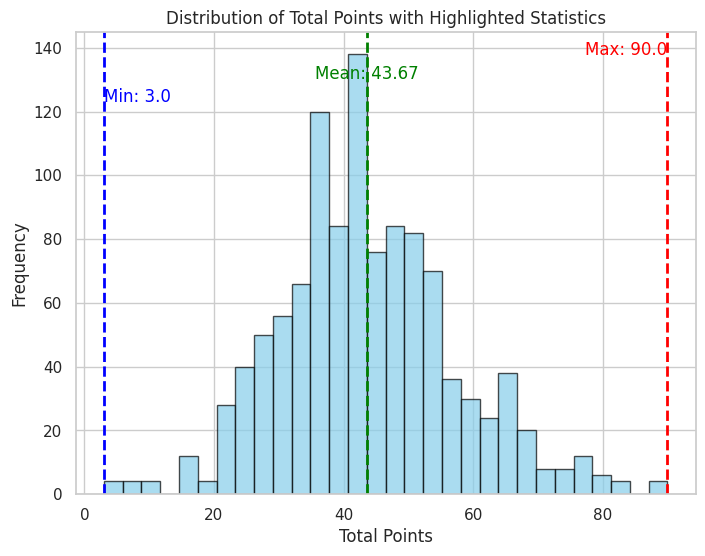

In [101]:
data = merged_df['Total_Points']
fig, ax = plt.subplots(figsize=(8, 6))
n, bins, patches = ax.hist(data, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
max_points = data.max()
min_points = data.min()
mean_points = data.mean()
ax.axvline(max_points, color='red', linestyle='dashed', linewidth=2)
ax.axvline(min_points, color='blue', linestyle='dashed', linewidth=2)
ax.axvline(mean_points, color='green', linestyle='dashed', linewidth=2)
ax.text(max_points, plt.gca().get_ylim()[1]*0.95, f'Max: {max_points}', color='red', horizontalalignment='right')
ax.text(min_points, plt.gca().get_ylim()[1]*0.85, f'Min: {min_points}', color='blue', horizontalalignment='left')
ax.text(mean_points, plt.gca().get_ylim()[1]*0.9, f'Mean: {np.round(mean_points, 2)}', color='green', horizontalalignment='center')
ax.set_xlabel('Total Points')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Total Points with Highlighted Statistics')

In [102]:
df_winning_team = merged_df[merged_df['Team1_Win']==1]
df_losing_team = merged_df[merged_df['Team1_Win']==0]

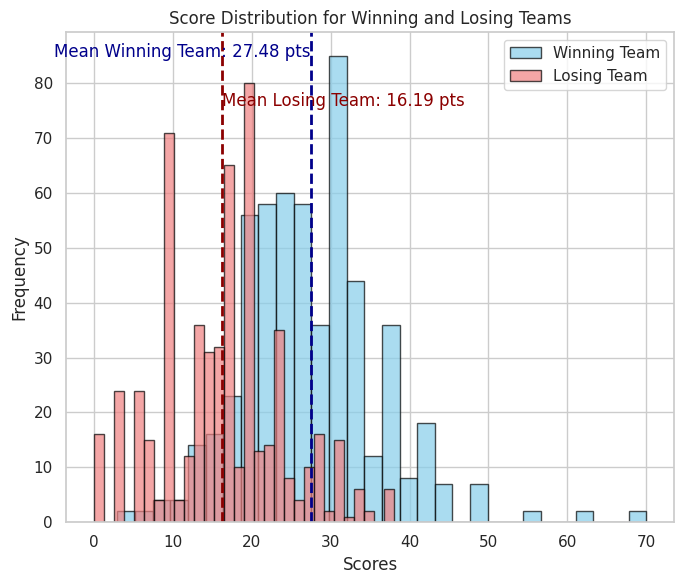

In [103]:
mean_score_winning_team = df_winning_team['Team1_Score'].mean()
mean_score_losing_team = df_losing_team['Team1_Score'].mean()
fig, ax = plt.subplots(figsize=(7, 6))
n_winning_team, bins_winning_team, patches_winning_team = ax.hist(df_winning_team['Team1_Score'], bins=30, color='skyblue', alpha=0.7, edgecolor='black', label='Winning Team')
n_losing_team, bins_losing_team, patches_losing_team = ax.hist(df_losing_team['Team1_Score'], bins=30, color='lightcoral', alpha=0.7, edgecolor='black', label='Losing Team')
ax.axvline(mean_score_winning_team, color='darkblue', linestyle='dashed', linewidth=2)
ax.axvline(mean_score_losing_team, color='darkred', linestyle='dashed', linewidth=2)
ax.text(mean_score_winning_team, plt.gca().get_ylim()[1]*0.95, f'Mean Winning Team: {mean_score_winning_team:.2f} pts', color='darkblue', horizontalalignment='right')
ax.text(mean_score_losing_team, plt.gca().get_ylim()[1]*0.85, f'Mean Losing Team: {mean_score_losing_team:.2f} pts', color='darkred', horizontalalignment='left')
ax.set_xlabel('Scores')
ax.set_ylabel('Frequency')
ax.set_title('Score Distribution for Winning and Losing Teams')
ax.legend()
plt.tight_layout()
plt.show()

In [30]:
correlation_heatmap = merged_df.iloc[:,5:15].corr(method ='pearson')
correlation_heatmap.style.background_gradient(cmap='Blues')

,Team1_Score,Team2_Score,Team1_Passing,Team1_Rushing,Team1_Turnovers,Team2_Passing,Team2_Rushing,Team2_Turnovers,Is_Playoff,Score_Difference
Team1_Score,1.000000,-0.069824,0.516723,0.406928,-0.316225,0.098430,-0.177643,0.305629,0.006279,0.731377
Team2_Score,-0.069824,1.000000,0.098430,-0.177643,0.305629,0.516723,0.406928,-0.316225,0.006279,-0.731377
Team1_Passing,0.516723,0.098430,1.000000,-0.079225,0.007509,0.157144,-0.096935,-0.053127,0.008253,0.285962
Team1_Rushing,0.406928,-0.177643,-0.079225,1.000000,-0.114169,-0.096935,-0.245861,0.118111,0.001132,0.399638
Team1_Turnovers,-0.316225,0.305629,0.007509,-0.114169,1.000000,-0.053127,0.118111,-0.206167,-0.010618,-0.425125
Team2_Passing,0.098430,0.516723,0.157144,-0.096935,-0.053127,1.000000,-0.079225,0.007509,0.008253,-0.285962
Team2_Rushing,-0.177643,0.406928,-0.096935,-0.245861,0.118111,-0.079225,1.000000,-0.114169,0.001132,-0.399638
Team2_Turnovers,0.305629,-0.316225,-0.053127,0.118111,-0.206167,0.007509,-0.114169,1.000000,-0.010618,0.425125
Is_Playoff,0.006279,0.006279,0.008253,0.001132,-0.010618,0.008253,0.001132,-0.010618,1.000000,-0.000000
Score_Difference,0.731377,-0.731377,0.285962,0.399638,-0.425125,-0.285962,-0.399638,0.425125,-0.000000,1.000000


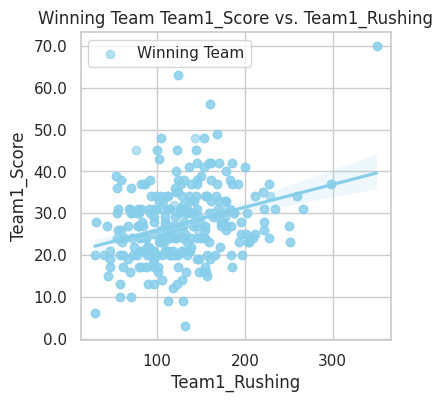

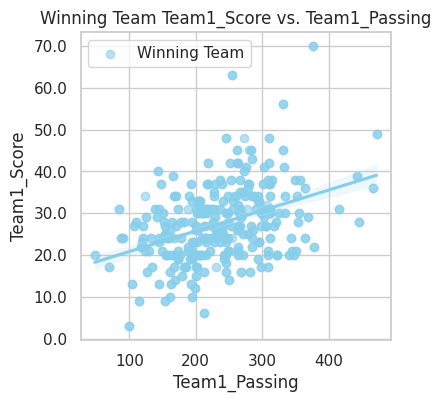

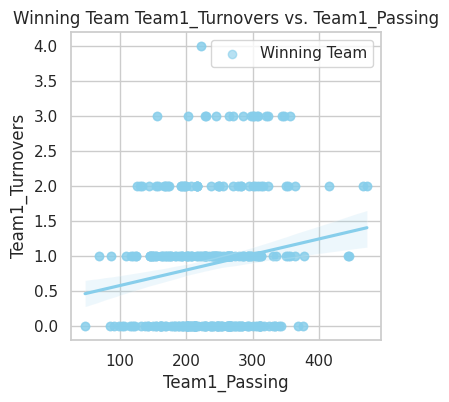

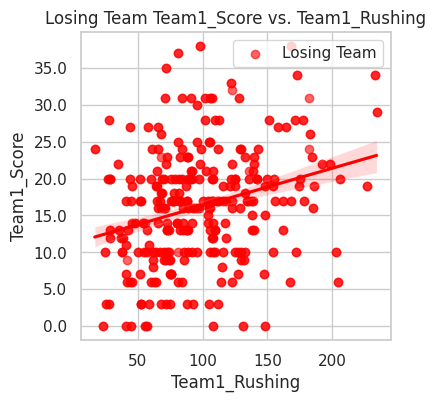

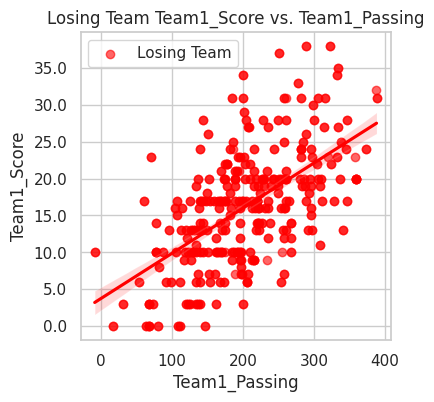

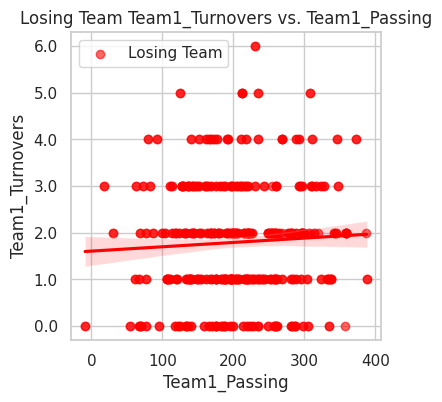

In [106]:
metrics = [('Team1_Rushing', 'Team1_Score'), ('Team1_Passing', 'Team1_Score'), ('Team1_Passing', 'Team1_Turnovers')]
for x_var, y_var in metrics:
    plt.figure(figsize=(4, 4))
    ax = sns.regplot(x=x_var, y=y_var, data=df_winning_team, scatter_kws={'alpha':0.6}, color='skyblue', label='Winning Team')
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))  # Format y-ticks to show one decimal place
    plt.title(f"Winning Team {y_var} vs. {x_var}")
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.legend()
    plt.grid(True)
    plt.show()
for x_var, y_var in metrics:
    plt.figure(figsize=(4, 4))
    ax = sns.regplot(x=x_var, y=y_var, data=df_losing_team, scatter_kws={'alpha':0.6}, color='red', label='Losing Team')
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))  # Format y-ticks to show one decimal place
    plt.title(f"Losing Team {y_var} vs. {x_var}")
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.legend()
    plt.grid(True)
    plt.show()

## **4 Super Bowl LVIII Teams Analysis**

In [107]:
finalists = ['San Francisco 49ers', 'Kansas City Chiefs']
superbowl_contenders = merged_df[merged_df['Team1'].isin(finalists)]
superbowl_contenders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 255 to 1111
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Team1             73 non-null     object 
 1   Week              73 non-null     int64  
 2   Game Number       73 non-null     int64  
 3   Game Location     36 non-null     object 
 4   Team2             73 non-null     object 
 5   Team1_Score       73 non-null     int64  
 6   Team2_Score       73 non-null     float64
 7   Team1_Passing     73 non-null     float64
 8   Team1_Rushing     73 non-null     float64
 9   Team1_Turnovers   73 non-null     int64  
 10  Team2_Passing     73 non-null     float64
 11  Team2_Rushing     73 non-null     float64
 12  Team2_Turnovers   73 non-null     int64  
 13  Is_Playoff        73 non-null     int64  
 14  Score_Difference  73 non-null     float64
 15  Team1_Win         73 non-null     int64  
 16  Total_Points      73 non-null     float64


In [108]:
contender_stats = merged_df[merged_df["Team1"].isin(['San Francisco 49ers', 'Kansas City Chiefs'])]
average_team_stats = contender_stats.groupby("Team1")[["Team1_Score", "Team1_Passing", "Team1_Rushing", "Team1_Turnovers"]].agg('mean')
preferred_order = ['San Francisco 49ers', 'Kansas City Chiefs']
average_team_stats = average_team_stats.reindex(preferred_order)
average_team_stats

,Team1_Score,Team1_Passing,Team1_Rushing,Team1_Turnovers
Team1,,,,
San Francisco 49ers,28.888889,257.527778,140.111111,1.027778
Kansas City Chiefs,21.945946,245.486486,106.756757,1.567568


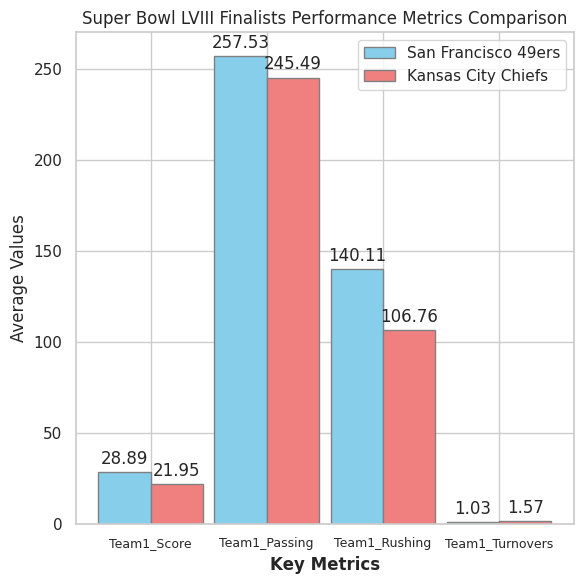

In [119]:
categories = ['Team1_Score', 'Team1_Passing', 'Team1_Rushing', 'Team1_Turnovers']
N = len(categories)
sf_stats = average_team_stats.loc['San Francisco 49ers'].values
kc_stats = average_team_stats.loc['Kansas City Chiefs'].values
fig, ax = plt.subplots(figsize=(6, 6))
barWidth = 0.45
r1 = np.arange(len(categories))
r2 = [x + barWidth for x in r1]
bars1 = ax.bar(r1, sf_stats, color='skyblue', width=barWidth, edgecolor='grey', label='San Francisco 49ers')
bars2 = ax.bar(r2, kc_stats, color='lightcoral', width=barWidth, edgecolor='grey', label='Kansas City Chiefs')
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
annotate_bars(bars1)
annotate_bars(bars2)
ax.set_xlabel('Key Metrics', fontweight='bold')
ax.set_xticks([r + barWidth/2 for r in range(len(categories))])
ax.set_xticklabels(categories)
ax.set_ylabel('Average Values')
ax.set_title('Super Bowl LVIII Finalists Performance Metrics Comparison')
ax.legend()
plt.xticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

## **5 Model Setup**

In [120]:
merged_df_rf = merged_df
merged_df_rf.head()

,Team1,Week,Game Number,Game Location,Team2,Team1_Score,Team2_Score,Team1_Passing,Team1_Rushing,Team1_Turnovers,Team2_Passing,Team2_Rushing,Team2_Turnovers,Is_Playoff,Score_Difference,Team1_Win,Total_Points
0,Arizona Cardinals,1,1,AWAY,Washington Commanders,16,20.0,114.0,96.0,2,156.0,92.0,3,0,-4.0,0,36.0
1,Arizona Cardinals,2,2,NaN,New York Giants,28,31.0,228.0,151.0,0,312.0,127.0,1,0,-3.0,0,59.0
2,Arizona Cardinals,3,3,NaN,Dallas Cowboys,28,16.0,178.0,222.0,0,231.0,185.0,1,0,12.0,1,44.0
3,Arizona Cardinals,4,4,AWAY,San Francisco 49ers,16,35.0,257.0,105.0,0,271.0,124.0,0,0,-19.0,0,51.0
4,Arizona Cardinals,5,5,NaN,Cincinnati Bengals,20,34.0,152.0,142.0,3,287.0,93.0,1,0,-14.0,0,54.0


In [121]:
merged_df_rf = merged_df.drop(['Team1'], axis=1)
merged_df_rf.head()

,Week,Game Number,Game Location,Team2,Team1_Score,Team2_Score,Team1_Passing,Team1_Rushing,Team1_Turnovers,Team2_Passing,Team2_Rushing,Team2_Turnovers,Is_Playoff,Score_Difference,Team1_Win,Total_Points
0,1,1,AWAY,Washington Commanders,16,20.0,114.0,96.0,2,156.0,92.0,3,0,-4.0,0,36.0
1,2,2,NaN,New York Giants,28,31.0,228.0,151.0,0,312.0,127.0,1,0,-3.0,0,59.0
2,3,3,NaN,Dallas Cowboys,28,16.0,178.0,222.0,0,231.0,185.0,1,0,12.0,1,44.0
3,4,4,AWAY,San Francisco 49ers,16,35.0,257.0,105.0,0,271.0,124.0,0,0,-19.0,0,51.0
4,5,5,NaN,Cincinnati Bengals,20,34.0,152.0,142.0,3,287.0,93.0,1,0,-14.0,0,54.0


In [122]:
merged_df_rf = pd.get_dummies(merged_df_rf, columns=['Game Location', 'Team2'])
merged_df_rf.head()

,Week,Game Number,Team1_Score,Team2_Score,Team1_Passing,Team1_Rushing,Team1_Turnovers,Team2_Passing,Team2_Rushing,Team2_Turnovers,Is_Playoff,Score_Difference,Team1_Win,Total_Points,Game Location_AWAY,Team2_Arizona Cardinals,Team2_Atlanta Falcons,Team2_Baltimore Ravens,Team2_Buffalo Bills,Team2_Carolina Panthers,Team2_Chicago Bears,Team2_Cincinnati Bengals,Team2_Cleveland Browns,Team2_Dallas Cowboys,Team2_Denver Broncos,Team2_Detroit Lions,Team2_Green Bay Packers,Team2_Houston Texans,Team2_Indianapolis Colts,Team2_Jacksonville Jaguars,Team2_Kansas City Chiefs,Team2_Las Vegas Raiders,Team2_Los Angeles Chargers,Team2_Los Angeles Rams,Team2_Miami Dolphins,Team2_Minnesota Vikings,Team2_New England Patriots,Team2_New Orleans Saints,Team2_New York Giants,Team2_New York Jets,Team2_Philadelphia Eagles,Team2_Pittsburgh Steelers,Team2_San Francisco 49ers,Team2_Seattle Seahawks,Team2_Tampa Bay Buccaneers,Team2_Tennessee Titans,Team2_Washington Commanders
0,1,1,16,20.0,114.0,96.0,2,156.0,92.0,3,0,-4.0,0,36.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,2,28,31.0,228.0,151.0,0,312.0,127.0,1,0,-3.0,0,59.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,3,3,28,16.0,178.0,222.0,0,231.0,185.0,1,0,12.0,1,44.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,4,16,35.0,257.0,105.0,0,271.0,124.0,0,0,-19.0,0,51.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5,5,20,34.0,152.0,142.0,3,287.0,93.0,1,0,-14.0,0,54.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [123]:
merged_df_rf.isnull().values.any()

False

In [124]:
numerical = merged_df_rf.applymap(lambda x: isinstance(x, (int, float)))
numerical.head(1)

,Week,Game Number,Team1_Score,Team2_Score,Team1_Passing,Team1_Rushing,Team1_Turnovers,Team2_Passing,Team2_Rushing,Team2_Turnovers,Is_Playoff,Score_Difference,Team1_Win,Total_Points,Game Location_AWAY,Team2_Arizona Cardinals,Team2_Atlanta Falcons,Team2_Baltimore Ravens,Team2_Buffalo Bills,Team2_Carolina Panthers,Team2_Chicago Bears,Team2_Cincinnati Bengals,Team2_Cleveland Browns,Team2_Dallas Cowboys,Team2_Denver Broncos,Team2_Detroit Lions,Team2_Green Bay Packers,Team2_Houston Texans,Team2_Indianapolis Colts,Team2_Jacksonville Jaguars,Team2_Kansas City Chiefs,Team2_Las Vegas Raiders,Team2_Los Angeles Chargers,Team2_Los Angeles Rams,Team2_Miami Dolphins,Team2_Minnesota Vikings,Team2_New England Patriots,Team2_New Orleans Saints,Team2_New York Giants,Team2_New York Jets,Team2_Philadelphia Eagles,Team2_Pittsburgh Steelers,Team2_San Francisco 49ers,Team2_Seattle Seahawks,Team2_Tampa Bay Buccaneers,Team2_Tennessee Titans,Team2_Washington Commanders
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [125]:
prediction_variables = ["Team1_Passing", "Team1_Rushing", "Team1_Turnovers", "Team2_Passing", "Team2_Rushing", "Team2_Turnovers"]
print(prediction_variables)

['Team1_Passing', 'Team1_Rushing', 'Team1_Turnovers', 'Team2_Passing', 'Team2_Rushing', 'Team2_Turnovers']


## **6 Random Forest Classifier for Winning Team Prediction**

In [126]:
train_rfc = merged_df_rf[merged_df_rf['Week'] < 10]
test_rfc = merged_df_rf[merged_df_rf['Week'] >= 10]

In [127]:
X_train_rfc = train_rfc[prediction_variables]
y_train_rfc = train_rfc['Team1_Win']
X_test_rfc = test_rfc[prediction_variables]
y_test_rfc = test_rfc['Team1_Win']

In [128]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [129]:
rfc.fit(X_train_rfc, y_train_rfc)

RandomForestClassifier(random_state=42)

### **RFC Performance**

In [130]:
from sklearn.metrics import accuracy_score

predictions = rfc.predict(X_test_rfc)
accuracy_rfc = accuracy_score(y_test_rfc, predictions)
accuracy_rfc

0.7799295774647887

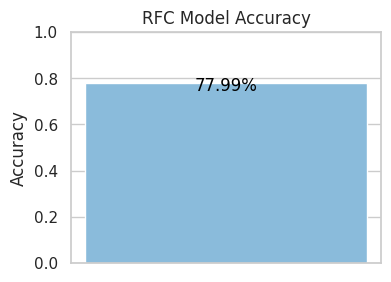

In [132]:
plt.figure(figsize=(4, 3))
sns.set(style="whitegrid", font_scale=1)
bar_color = sns.color_palette("Blues_d").as_hex()[0]
plt.bar([""], [accuracy_rfc], color=bar_color)
plt.text(0, accuracy_rfc - 0.05, f'{accuracy_rfc:.2%}', color='black', ha='center', va='bottom')
plt.title('RFC Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks([])
plt.show()

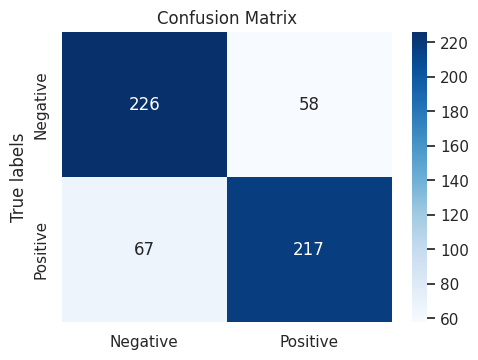

In [133]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_rfc, predictions)
def plot_confusion_matrix(cm, labels=['Negative', 'Positive']):
    plt.figure(figsize=(5, 4))
    sns.set(style="whitegrid", font_scale=1)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True, xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.xlabel('')
    plt.show()
plot_confusion_matrix(cm)

In [134]:
import pandas as pd

combined = pd.DataFrame({'actual': y_test_rfc, 'prediction': predictions})
confusion_crosstab = pd.crosstab(index=combined["actual"], columns=combined["prediction"], rownames=['Actual'], colnames=['Predicted'], margins=True)
confusion_crosstab

Predicted,0,1,All
Actual,,,
0,226,58,284
1,67,217,284
All,293,275,568


In [135]:
from sklearn.metrics import precision_score

precision = precision_score(y_test_rfc, predictions)
precision

0.7890909090909091

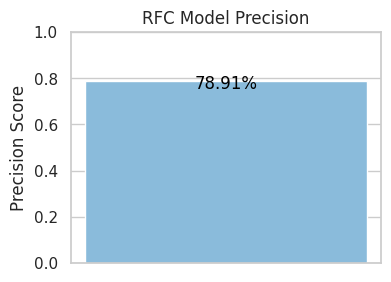

In [136]:
plt.figure(figsize=(4, 3))
sns.set(style="whitegrid", font_scale=1)
bar_color = sns.color_palette("Blues_d").as_hex()[0]
plt.bar([""], [precision], color=bar_color)
plt.text(0, precision - 0.05, f'{precision:.2%}', color='black', ha='center', va='bottom')
plt.title('RFC Model Precision')
plt.ylabel('Precision Score')
plt.ylim(0, 1)
plt.xticks([])
plt.show()

### **Winning Team Prediction**

In [137]:
df_teams_stats = average_team_stats.drop(columns=['Team1_Score'])
desired_order = ['San Francisco 49ers', 'Kansas City Chiefs']
df_teams_stats = df_teams_stats.loc[desired_order]
df_teams_stats

,Team1_Passing,Team1_Rushing,Team1_Turnovers
Team1,,,
San Francisco 49ers,257.527778,140.111111,1.027778
Kansas City Chiefs,245.486486,106.756757,1.567568


In [138]:
team_stats_values = df_teams_stats.values.flatten()
print(team_stats_values)

[257.52777778 140.11111111   1.02777778 245.48648649 106.75675676
   1.56756757]


In [139]:
team_stats_values = df_teams_stats.values.flatten()
predicted_winner = pd.DataFrame([team_stats_values], columns=prediction_variables)
predicted_winner

,Team1_Passing,Team1_Rushing,Team1_Turnovers,Team2_Passing,Team2_Rushing,Team2_Turnovers
0,257.527778,140.111111,1.027778,245.486486,106.756757,1.567568


In [140]:
rfc.predict(predicted_winner)

array([1])

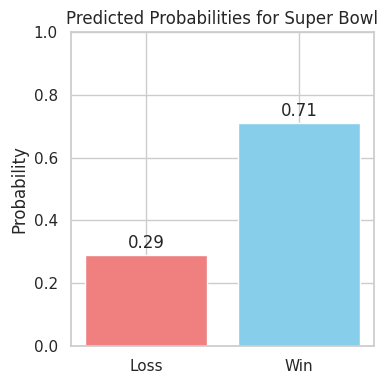

In [141]:
probs = rfc.predict_proba(predicted_winner)
fig, ax = plt.subplots(figsize=(4, 4))
labels = ['Loss', 'Win']
ax.bar(labels, probs[0], color=['lightcoral', 'skyblue'])
for i, v in enumerate(probs[0]):
    ax.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
ax.set_title('Predicted Probabilities for Super Bowl')
ax.set_ylabel('Probability')
ax.set_ylim(0, 1)
plt.tight_layout()
plt.show()

## **7 Random Forest Regressor for Score Prediction**

In [142]:
train_rfr = merged_df_rf[merged_df_rf['Week'] < 10]
test_rfr = merged_df_rf[merged_df_rf['Week'] >= 10]

In [143]:
X_train_rfr = train_rfr[prediction_variables]
y_train_rfr = train_rfr['Team1_Score']
X_test_rfr = test_rfr[prediction_variables]
y_test_rfr = test_rfr['Team1_Score']

In [144]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(min_samples_split=10, n_estimators=50, random_state=42)

In [145]:
rfr.fit(X_train_rfr, y_train_rfr)

RandomForestRegressor(min_samples_split=10, n_estimators=50, random_state=42)

### **RFR Performance**

In [146]:
zero_indices = y_test_rfr[y_test_rfr == 0].index
zero_indices

Int64Index([83, 84, 284, 368, 421, 920, 945, 984, 1028, 1060], dtype='int64')

In [147]:
X_test_rfr_filtered = X_test_rfr.drop(zero_indices)
y_test_rfr_filtered = y_test_rfr.drop(zero_indices)

In [148]:
from sklearn.metrics import accuracy_score

prediction_rfr = rfr.predict(X_test_rfr_filtered)
errors = abs(prediction_rfr - y_test_rfr_filtered)
mape = np.mean(100 * (errors / y_test_rfr_filtered))
accuracy_rfr = 100 - mape
accuracy_rfr

66.66134765378997

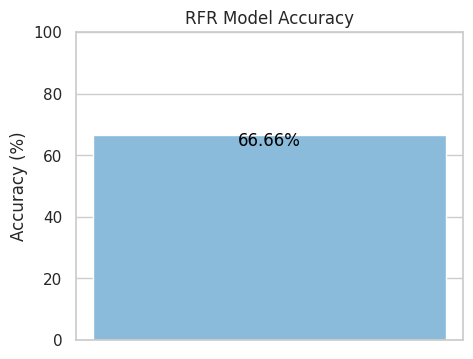

In [149]:
plt.figure(figsize=(5, 4))
sns.set(style="whitegrid", font_scale=1)
bar_color = sns.color_palette("Blues_d")[0]
plt.bar([""], [accuracy_rfr], color=bar_color)
plt.text(0, accuracy_rfr - 5, f'{accuracy_rfr:.2f}%', color='black', ha='center', va='bottom')
plt.title('RFR Model Accuracy')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.xticks([])
plt.show()

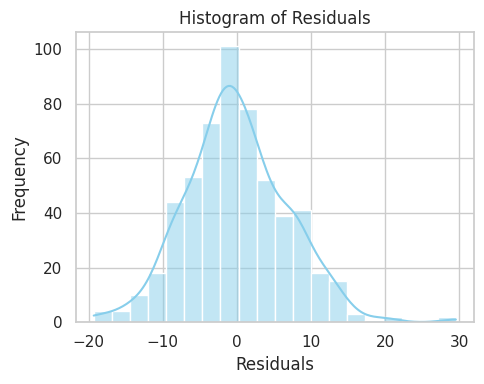

In [150]:
residuals = y_test_rfr_filtered - prediction_rfr
plt.figure(figsize=(5, 4))
sns.histplot(residuals, kde=True, color='skyblue', bins=20)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

### **Score Predictions**

In [151]:
df_teams_stats

,Team1_Passing,Team1_Rushing,Team1_Turnovers
Team1,,,
San Francisco 49ers,257.527778,140.111111,1.027778
Kansas City Chiefs,245.486486,106.756757,1.567568


In [152]:
team_stats_values

array([257.52777778, 140.11111111,   1.02777778, 245.48648649,
       106.75675676,   1.56756757])

In [153]:
predicted_winner

,Team1_Passing,Team1_Rushing,Team1_Turnovers,Team2_Passing,Team2_Rushing,Team2_Turnovers
0,257.527778,140.111111,1.027778,245.486486,106.756757,1.567568


In [154]:
predict_sff_score = predicted_winner.copy()
sff_predicted_score = rfr.predict(predict_sff_score)
sff_predicted_score

array([29.0785988])

In [156]:
kcc_stats_as_team1 = np.hstack([predicted_winner.values[0][3:], predicted_winner.values[0][:3]])

predict_kcc_score = pd.DataFrame([kcc_stats_as_team1], columns=prediction_variables)
kcc_predicted_score = rfr.predict(predict_kcc_score)
kcc_predicted_score

array([20.24457051])

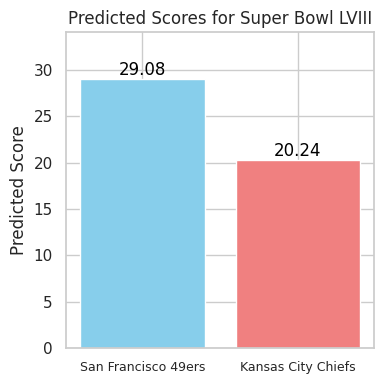

In [157]:
sff_predicted_score = sff_predicted_score.flatten()[0]
kcc_predicted_score = kcc_predicted_score.flatten()[0]

teams = ['San Francisco 49ers', 'Kansas City Chiefs']
predicted_scores = [sff_predicted_score, kcc_predicted_score]
team_colors = ['skyblue', 'lightcoral']
plt.figure(figsize=(4, 4))
sns.set(style="whitegrid", font_scale=1)
bars = plt.bar(teams, predicted_scores, color=team_colors)
for bar, score in zip(bars, predicted_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2f}',
             ha='center', va='bottom', color='black', fontsize=12)
plt.title('Predicted Scores for Super Bowl LVIII')
plt.ylabel('Predicted Score')
plt.ylim(0, max(predicted_scores) + 5)
plt.xticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()